## Лабораторная работа 7

### Вариант 10

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from ipywidgets import interact

In [2]:
def Plot(count, points_xy):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    colors = sns.color_palette("tab10")

    for i in range(count):
            for j, xy in enumerate(points_xy[i][:-1]):
                try:
                    lbl = xy[2]
                except:
                    lbl = '.'
                ax.plot(xy[0], xy[1], color = colors[i % len(colors)], label = lbl + ' ' + points_xy[i][-1])
                ax.legend()
    plt.subplots_adjust(hspace=0.5)

#TRIDIAGONAL_MATRIX_ALGORITHM

class Tridiagonal_Matrix_Algorithm:
    def __init__(self, A, _d):
        self.n = len(_d)
        self.a = []
        self.b = []
        self.c = []
        self.d = _d
        self.A = A

        self.a.append(0);
        self.b.append(self.A[0][0])
        self.c.append(self.A[0][1])
        for i in range(1, self.n - 1):
            self.a.append(self.A[i][i - 1])
            self.b.append(self.A[i][i])
            self.c.append(self.A[i][i + 1])

        self.a.append(self.A[self.n - 1][self.n - 2])
        self.b.append(self.A[self.n - 1][self.n - 1])
        self.c.append(0)

        self.Make_P_andQ()
        self.x = self.Make_x()

    def Ans(self):
        return self.x

    def Make_P_andQ(self):
        self.p = []
        self.q = []
        self.p.append(- self.c[0] / self.b[0])
        self.q.append(self.d[0] / self.b[0])

        for i in range(1, self.n - 1):
           self.p.append(- self.c[i] / (self.b[i] + self.a[i] * self.p[i - 1]))
           self.q.append((self.d[i] - self.a[i] * self.q[i - 1]) / (self.b[i] + self.a[i] * self.p[i - 1]))

    def Make_x(self):
        self.ans = np.zeros(self.n)

        self.ans[self.n - 1] = (self.d[self.n - 1] - self.a[self.n - 1] * self.q[self.n - 2]) / (self.b[self.n - 1] + self.a[self.n - 1] * self.p[self.n - 2]);

        for i in range(self.n - 2, -1, -1):
            self.ans[i] = self.p[i] * self.ans[i + 1] + self.q[i]

        return self.ans.tolist()

$$ \frac{du}{dt} = a * (\frac{d^2u}{dx^2} + \frac{d^2u}{dy^2}) + f(x, y, t) 

In [3]:
# a_x, a_y = 1, 1
# b_x, b_y = 0, 0
# c_x, c_y = 0, 0

# f = lambda x, y, t: - x * y * math.sin(t)

# u_x_y_0 = lambda x, y: x * y

# lx = [0, 1]
# ly = [0, 1]
# hx = 0.1
# hy = 0.1

# alph_0x = 0
# beta_0x = 1
# gamma_0x = lambda y, t: 0
# alph_lx = 0
# beta_lx = 1
# gamma_lx = lambda y, t: y * math.cos(t)

# alph_0y = 0
# beta_0y = 1
# gamma_0y = lambda x, t: 0
# alph_ly = 0
# beta_ly = 1
# gamma_ly = lambda x, t: x * math.cos(t)

# U = lambda x, y, t: x * y * np.cos(t)


# ВАРИАНТ 10

a_x, a_y = 1, 1
b_x, b_y = 0, 0
c_x, c_y = 0, 0

f = lambda x, y, t: math.sin(x)* math.sin(x) * (math.cos(t) + 2 * math.sin(t))

u_x_y_0 = lambda x, y: 0

lx = [0, math.pi]
ly = [0, math.pi]
hx = 0.01 * math.pi
hy = 0.01 * math.pi

alph_0x = 0
beta_0x = 1
gamma_0x = lambda y, t: 0
alph_lx = 1
beta_lx = 0
gamma_lx = lambda y, t: - math.sin(y) * math.sin(t)

alph_0y = 0
beta_0y = 1
gamma_0y = lambda x, t: 0
alph_ly = 1
beta_ly = 0
gamma_ly = lambda x, t: - math.sin(x) * math.sin(t)

U = lambda x, y, t: np.sin(x) * np.sin(y) * np.sin(t)

In [4]:
def get_point(l1, l2, hx, hy, u_pred, time):
    x = np.arange(l1[0], l1[1], hx)
    y = np.arange(l2[0], l2[1], hy)
    xv, yv = np.meshgrid(x, y)
    U_true = U(xv, yv, time)
    U_pred = u_pred.T
    return xv, yv, U_true, U_pred

метод переменных направлений

In [5]:
class ADI:
    def __init__(self, u_x_y_0, f):
        self.u_x_y_0 = u_x_y_0
        self.f = f

    def Get(self, lx, ly, hx, hy, T, sigm = 1/4):

        tau = sigm / (a_x / hx**2 + a_y / hy**2)
        self.tau = tau
        x = np.arange(lx[0], lx[1], hx)
        y = np.arange(ly[0], ly[1], hy)
        self.x = x
        self.y = y
        n_x = len(x)
        n_y = len(y)

        U_t = []
        u_xy = u_k = np.array([np.zeros_like(y) for _ in range(n_x)], dtype=np.float64)
        for i in range(n_x):
            for j in range(n_y):
                u_xy[i][j] = self.u_x_y_0(x[i], y[j])
        U_t += [u_xy]

        t = tau
        
        while t < T:
            u_k = np.array([np.zeros_like(y) for _ in range(n_x)], dtype=np.float64)
            
            t += tau / 2
            for j in range(n_y):
                A = np.zeros((n_x, n_x), dtype=np.float64)
                d = np.zeros(n_x, dtype=np.float64)
                i = 0
                for row in A[1:-1]:
                    row[i] = a_x / hx**2 - b_x / (2 * hx)
                    row[i + 1] = - 2 / tau - 2 * a_x / hx**2 +c_x
                    row[i + 2] = a_x / hx**2 + b_x / (2 * hx)
                    i += 1
                    u = U_t[-1]
                    d[i] = - u[i][j] * 2 / tau 
                    d[i] -= (a_y / hy**2) * (u[i+1][j] - 2 * u[i][j] + u[i-1][j]) 
                    d[i] -= (b_y / (2 * hy)) * (u[i+1][j] -  u[i-1][j]) 
                    d[i] -= self.f(x[i], y[j], t)
                
                A[0][0] = -alph_0x /  hx + beta_0x
                A[0][1] = alph_0x / hx
                d[0] = gamma_0x(y[j], t)
                
                A[-1][-2] = - alph_lx /  hx
                A[-1][-1] = alph_lx / hx  + beta_lx
                d[-1] = gamma_lx(y[j], t)

                u_k_T = u_k.T
                u_k_T[j] = np.linalg.solve(A, d)
                u_k = u_k_T.T
            
            U_t += [u_k]
            t += tau / 2

            u_k = np.array([np.zeros_like(y) for _ in range(n_x)], dtype=np.float64)
            for i in range(n_x):
                A = np.zeros((n_y, n_y), dtype=np.float64)
                d = np.zeros(n_y, dtype=np.float64)

                j = 0
                for row in A[1:-1]:
                    row[j] = a_y / hy**2 - b_y / (2 * hy)
                    row[j + 1] = - 2 / tau - 2 * a_y / hy**2 +c_y
                    row[j + 2] = a_y / hy**2 + b_y / (2 * hy)
                    j += 1
                    u = U_t[-1]
                    d[j] = - u[i][j] * 2 / tau 
                    d[j] -= (a_x / hx**2) * (u[i][j+1] - 2 * u[i][j] + u[i][j-1]) 
                    d[j] -= (b_x / (2 * hx)) * (u[i][j-1] -  u[i][j-1]) 
                    d[j] -= self.f(x[i], y[j], t)

                A[0][0] = -alph_0y /  hy + beta_0y
                A[0][1] = alph_0y / hy
                d[0] = gamma_0y(x[i], t)
                
                A[-1][-2] = - alph_ly /  hy
                A[-1][-1] = alph_ly / hy  + beta_ly
                d[-1] = gamma_ly(x[i], t)

                u_k[i] = np.linalg.solve(A, d)
    
            U_t += [u_k]

        return U_t

    def Get_real_vals(self, U, appr_U):
        U_r = []
        for t, el in enumerate(appr_U):
            uu = np.zeros_like(el)
            for i in range(len(appr_U[t])):
                for j in range(len(appr_U[t][i])):
                    uu[i][j] = U(self.x[i], self.y[i], self.tau * i / 2)
            U_r += [uu]
        return U_r

    def Get_loss(self, U_appr, U_real):
        eps = [np.max(np.abs(np.array(U_real[i]) - np.array(U_appr[i]))) for i in range(len(U_appr))]
        return eps
        

In [6]:
adi = ADI(u_x_y_0, f)
u_pred_adi = adi.Get(lx, ly, hx, hy, T = 5, sigm=0.4)

u_real_adi = adi.Get_real_vals(U, u_pred_adi)
loss_adi = adi.Get_loss(u_pred_adi, u_real_adi)


data = []  
data.append([[[adi.tau * i / 2 for i in range(len(u_real_adi))], loss_adi, f' eps'], f'ADI'])
Plot(len(data), data)

KeyboardInterrupt: 

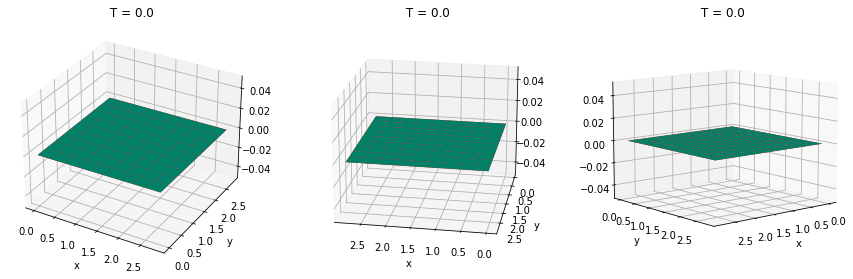

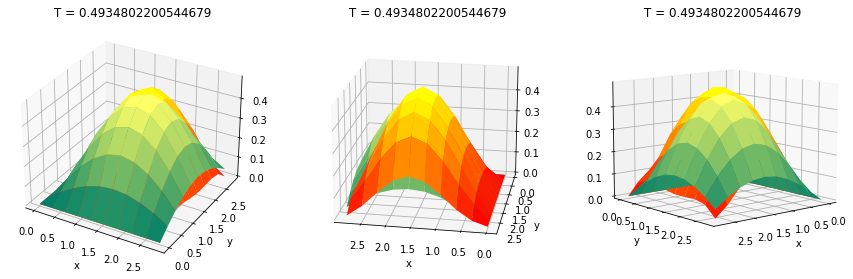

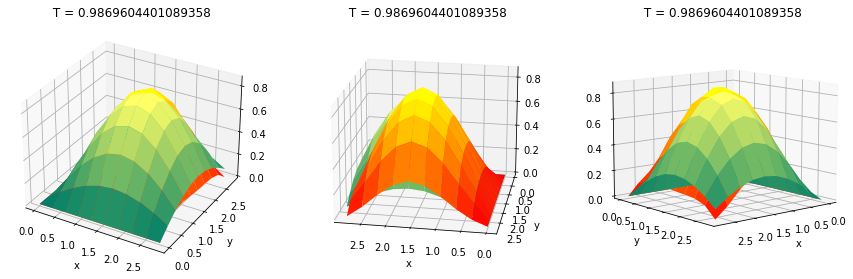

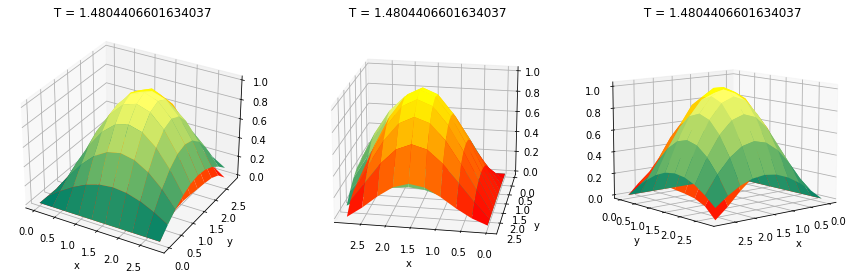

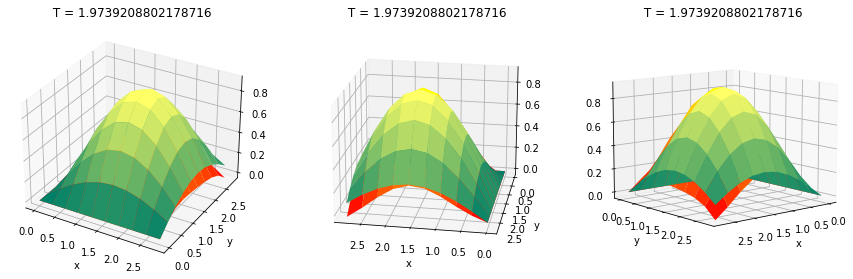

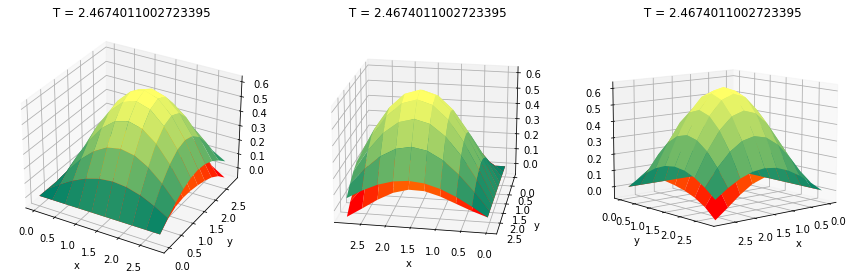

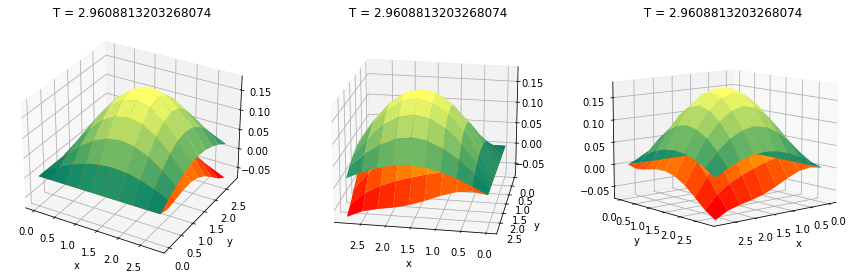

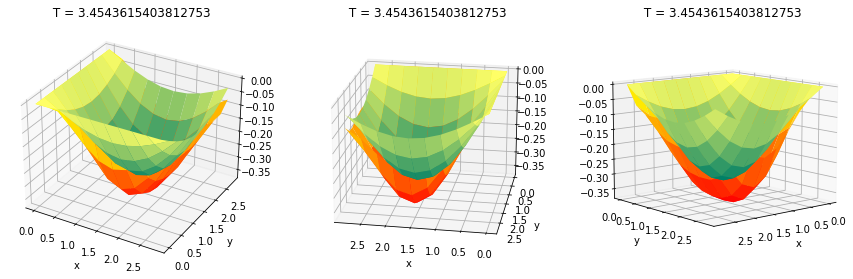

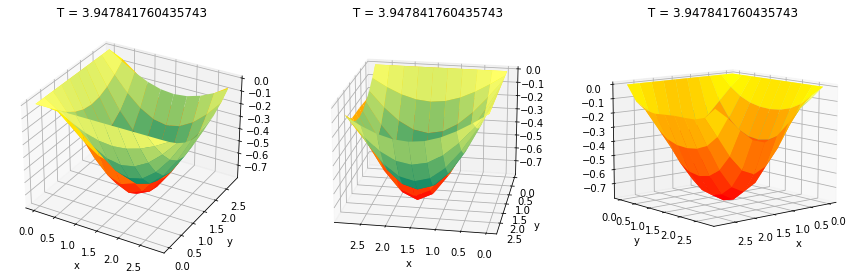

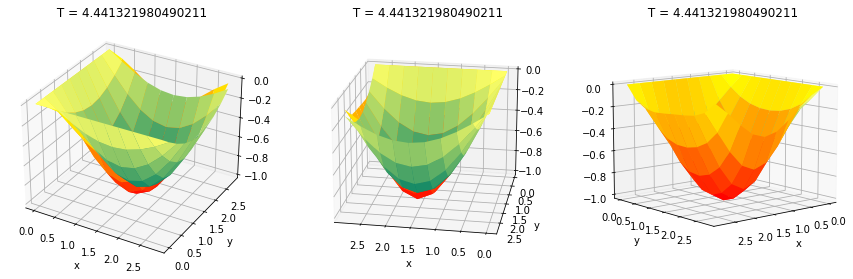

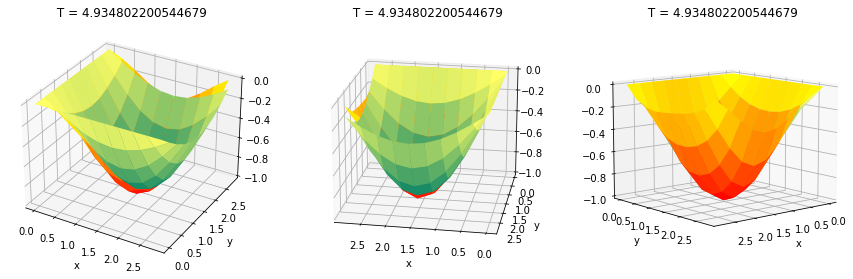

In [ ]:
for i in range(0, len(u_pred_adi), len(u_pred_adi) // 10):
    X, Y, U_true, U_pred = get_point(lx, ly, hx, hy, u_pred_adi[i], time = (adi.tau / 2) * i)
    fig = plt.figure(figsize=(15, 15))

    ax = fig.add_subplot(1, 3, 1, projection='3d')
    ax.plot_surface(X, Y, U_pred, cmap='autumn')
    ax.plot_surface(X, Y, U_true, cmap = 'summer')
    ax.set_xlabel('x')
    ax.set_ylabel('y');
    ax.set_title(f' T = {adi.tau * i / 2}')

    ax = fig.add_subplot(1, 3, 2, projection='3d')
    ax.plot_surface(X, Y, U_pred, cmap='autumn')
    ax.plot_surface(X, Y, U_true, cmap = 'summer')
    ax.view_init(20, 100)
    ax.set_xlabel('x')
    ax.set_ylabel('y');
    ax.set_title(f' T = {adi.tau * i / 2}')

    ax = fig.add_subplot(1, 3, 3, projection='3d')
    ax.plot_surface(X, Y, U_pred, cmap='autumn')
    ax.plot_surface(X, Y, U_true, cmap = 'summer')
    ax.view_init(10, 50)
    ax.set_xlabel('x')
    ax.set_ylabel('y');
    ax.set_title(f' T = {adi.tau * i / 2}')

метод дробных шагов 

In [ ]:
class CoordRelax:
    def __init__(self, u_x_y_0, f):
        self.u_x_y_0 = u_x_y_0
        self.f = f

    def Get(self, lx, ly, hx, hy, T, sigm = 1/4):
        tau = sigm / (a_x / hx**2 + a_y / hy**2)
        self.tau = tau
        x = np.arange(lx[0], lx[1], hx)
        y = np.arange(ly[0], ly[1], hy)
        self.x = x
        self.y = y
        n_x = len(x)
        n_y = len(y)

        U_t = []
        u_xy = u_k = np.array([np.zeros_like(y) for _ in range(n_x)], dtype=np.float64)
        for i in range(n_x):
            for j in range(n_y):
                u_xy[i][j] = self.u_x_y_0(x[i], y[j])
        U_t += [u_xy]

        t = tau
        
        while t < T:
            u_k = np.array([np.zeros_like(y) for _ in range(n_x)], dtype=np.float64)
            
            t += tau / 2
            for j in range(n_y):
                A = np.zeros((n_x, n_x), dtype=np.float64)
                d = np.zeros(n_x, dtype=np.float64)
                i = 0
                for row in A[1:-1]:
                    row[i] = a_x / hx**2 - b_x / (2 * hx)
                    row[i + 1] = - 1 / tau - 2 * a_x / hx**2 + c_x
                    row[i + 2] = a_x / hx**2 + b_x / (2 * hx)
                    i += 1
                    u = U_t[-1]
                    d[i] = - u[i][j] / tau - self.f(x[i], y[j], t)
                
                A[0][0] = -alph_0x /  hx + beta_0x
                A[0][1] = alph_0x / hx
                d[0] = gamma_0x(y[j], t)
                
                A[-1][-2] = - alph_lx /  hx
                A[-1][-1] = alph_lx / hx  + beta_lx
                d[-1] = gamma_lx(y[j], t)

                u_k_T = u_k.T
                u_k_T[j] = np.linalg.solve(A, d)
                u_k = u_k_T.T
            
            U_t += [u_k]
            t += tau / 2

            u_k = np.array([np.zeros_like(y) for _ in range(n_x)], dtype=np.float64)
            for i in range(n_x):
                A = np.zeros((n_y, n_y), dtype=np.float64)
                d = np.zeros(n_y, dtype=np.float64)

                j = 0
                for row in A[1:-1]:
                    row[j] = a_y / hy**2 - b_y / (2 * hy)
                    row[j + 1] = - 1 / tau - 2 * a_y / hy**2 +c_y
                    row[j + 2] = a_y / hy**2 + b_y / (2 * hy)
                    j += 1
                    u = U_t[-1]
                    d[j] = - u[i][j] / tau - self.f(x[i], y[j], t)

                A[0][0] = -alph_0y /  hy + beta_0y
                A[0][1] = alph_0y / hy
                d[0] = gamma_0y(x[i], t)
                
                A[-1][-2] = - alph_ly /  hy
                A[-1][-1] = alph_ly / hy  + beta_ly
                d[-1] = gamma_ly(x[i], t)

                u_k[i] = np.linalg.solve(A, d)
    
            U_t += [u_k]

        return U_t

    def Get_real_vals(self, U, appr_U):
        U_r = []
        for t, el in enumerate(appr_U):
            uu = np.zeros_like(el)
            for i in range(len(appr_U[t])):
                for j in range(len(appr_U[t][i])):
                    uu[i][j] = U(self.x[i], self.y[i], self.tau * i / 2)
            U_r += [uu]
        return U_r

    def Get_loss(self, U_appr, U_real):
        eps = [np.max(np.abs(np.array(U_real[i]) - np.array(U_appr[i]))) for i in range(len(U_appr))]
        return eps
        


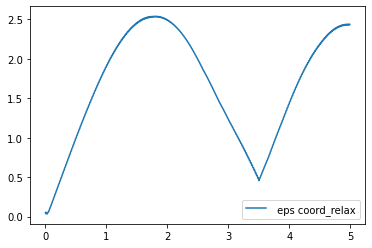

In [ ]:
coord_relax = CoordRelax(u_x_y_0, f)
u_pred_cr = coord_relax.Get(lx, ly, hx, hy, T = 5, sigm=0.4)

u_real_cr = coord_relax.Get_real_vals(U, u_pred_cr)
loss_cr = coord_relax.Get_loss(u_pred_cr, u_real_cr)


data = []  
data.append([[[coord_relax.tau * i / 2 for i in range(len(u_real_cr))], loss_cr, f' eps'], f'coord_relax'])
Plot(len(data), data)


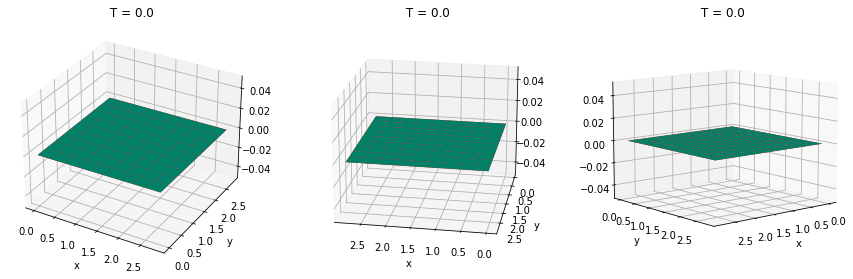

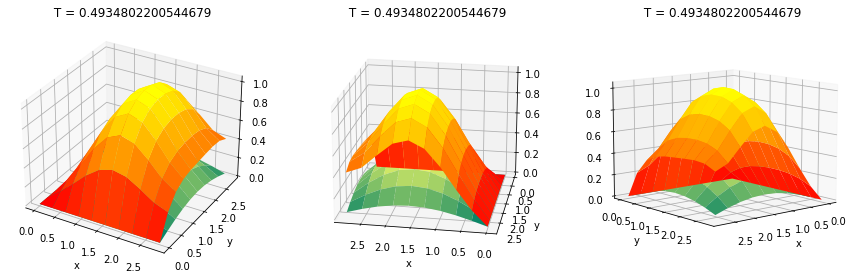

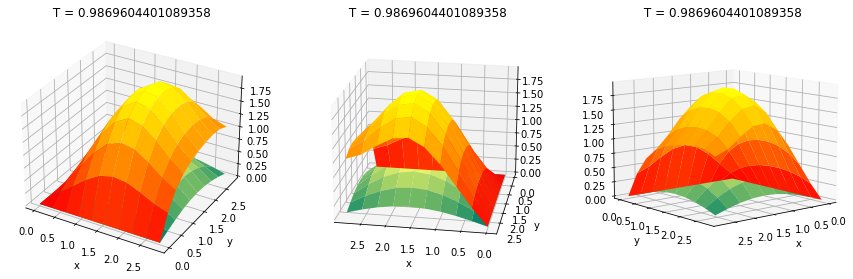

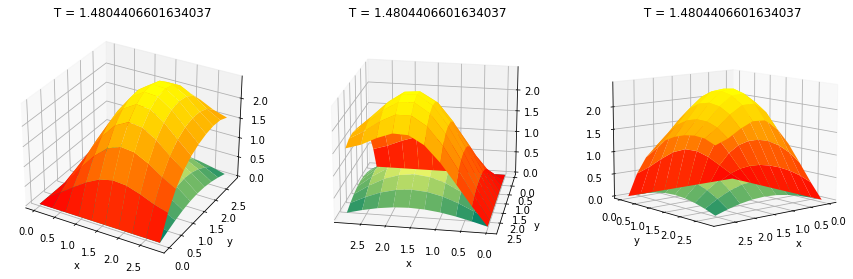

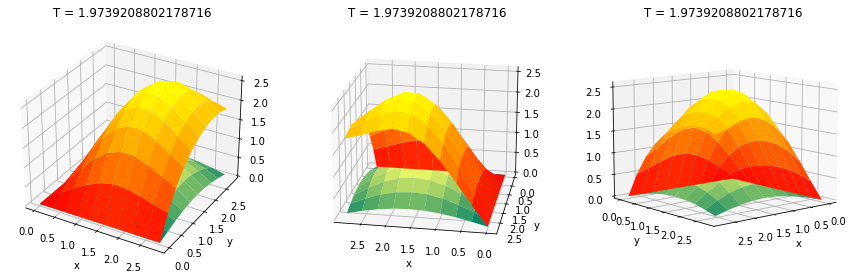

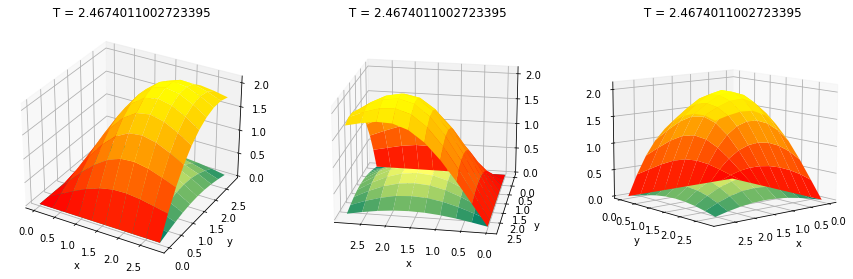

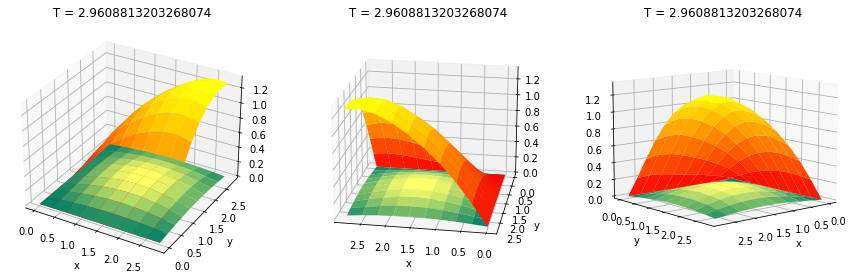

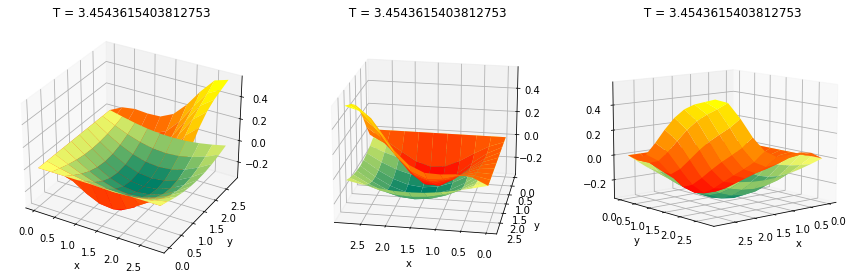

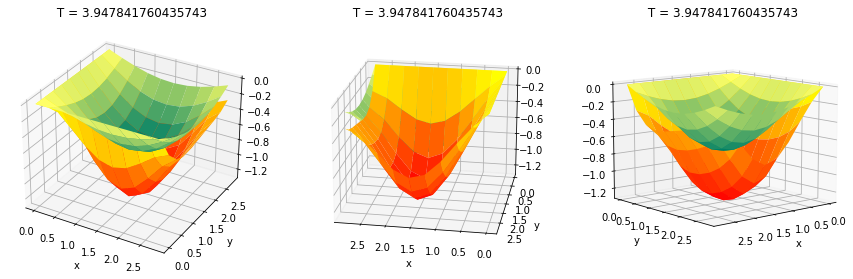

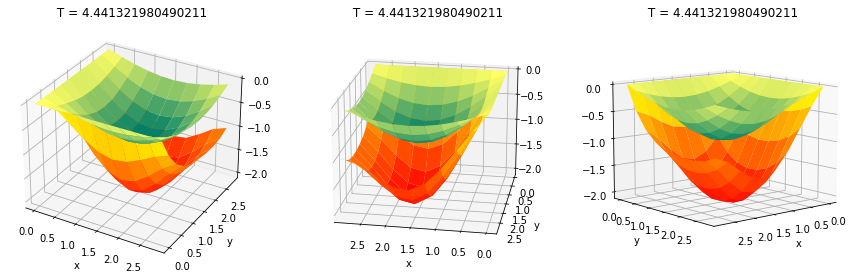

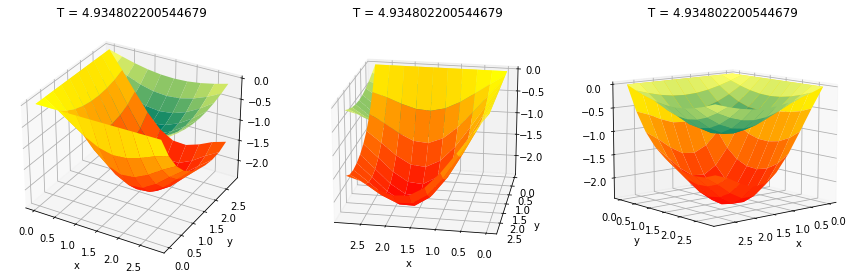

In [ ]:

for i in range(0, len(u_pred_cr), len(u_pred_cr) // 10):
    X, Y, U_true, U_pred = get_point(lx, ly, hx, hy, u_pred_cr[i], time = (coord_relax.tau / 2) * i)
    fig = plt.figure(figsize=(15, 15))

    ax = fig.add_subplot(1, 3, 1, projection='3d')
    ax.plot_surface(X, Y, U_pred, cmap='autumn')
    ax.plot_surface(X, Y, U_true, cmap = 'summer')
    ax.set_xlabel('x')
    ax.set_ylabel('y');
    ax.set_title(f' T = {coord_relax.tau * i / 2}')

    ax = fig.add_subplot(1, 3, 2, projection='3d')
    ax.plot_surface(X, Y, U_pred, cmap='autumn')
    ax.plot_surface(X, Y, U_true, cmap = 'summer')
    ax.view_init(20, 100)
    ax.set_xlabel('x')
    ax.set_ylabel('y');
    ax.set_title(f' T = {coord_relax.tau * i / 2}')

    ax = fig.add_subplot(1, 3, 3, projection='3d')
    ax.plot_surface(X, Y, U_pred, cmap='autumn')
    ax.plot_surface(X, Y, U_true, cmap = 'summer')
    ax.view_init(10, 50)
    ax.set_xlabel('x')
    ax.set_ylabel('y');
    ax.set_title(f' T = {coord_relax.tau * i / 2}')

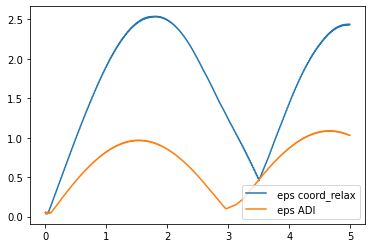

In [ ]:
data = []  
data.append([[[coord_relax.tau * i / 2 for i in range(len(u_real_cr))], loss_cr, f' eps'], f'coord_relax'])
data.append([[[adi.tau * i / 2 for i in range(len(u_real_adi))], loss_adi, f' eps'], f'ADI'])
Plot(len(data), data)